<h2 style="color:#000000; border:2px solid #6D7E86; text-align:center; border-radius:8px; background-color:rgb(199,239,0,0.5);text-transform:uppercase;padding:0.7rem">🚀Upvote if you find it useful!</h2>


## Pet Classify Hub


### Importing Essential Packages 📦🔍


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
import cv2

### Importing Images 📦📸


In [89]:
folder_path_train = "..\data\dogs-vs-cats\\train"
current_directory = os.getcwd()
full_path_train = os.path.join(current_directory, folder_path_train)
full_path_train = os.path.normpath(full_path_train)
print(full_path_train)

folder_path_test = "..\data\dogs-vs-cats\\test"
current_directory = os.getcwd()
full_path_test = os.path.join(current_directory, folder_path_test)
full_path_test = os.path.normpath(full_path_test)
print(full_path_test)

d:\Machine-learning\Pet-Classify-Hub\data\dogs-vs-cats\train
d:\Machine-learning\Pet-Classify-Hub\data\dogs-vs-cats\test


#### Importing all images


In [90]:
train_images_df = []
train_labels_df = []
# plt.figure(figsize=(16, 9))
for filename in os.listdir(full_path_train):
    if filename.endswith(".jpg"):
        image_path = os.path.join(full_path_train, filename)
        if len(train_images_df) % 100 == 0:
            print(len(train_images_df))
        img = cv2.imread(image_path)
        # plt.subplot(5, 6, len(images) + 1)
        # plt.imshow(img)
        if len(train_images_df) == 1000:
            break
        train_images_df.append(img)
        train_labels_df.append(filename.split(".")[0])
print("Shape of images array:", len(train_images_df))
print("Shape of labels array:", train_labels_df[:10])
# plt.imshow(img)

0
100
200
300
400
500
600
700
800
900
1000
Shape of images array: 1000
Shape of labels array: ['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']


#### Imported only 1000 images for train


In [91]:
train_images_df = []
train_labels_df = []

num_dogs = 0
num_cats = 0
target_images = 2500

for filename in os.listdir(full_path_train):
    if filename.endswith(".jpg"):
        image_path = os.path.join(full_path_train, filename)
        img = cv2.imread(image_path)

        label = filename.split(".")[0]
        if label == "cat" and num_cats < target_images / 2:
            train_images_df.append(img)
            train_labels_df.append(label)
            num_cats += 1
        elif label == "dog" and num_dogs < target_images / 2:
            train_images_df.append(img)
            train_labels_df.append(label)
            num_dogs += 1

        # Break if we have enough images
        if num_cats + num_dogs == target_images:
            break

print("Number of cat images:", num_cats)
print("Number of dog images:", num_dogs)
print("Shape of images array:", len(train_images_df))
print("Shape of labels array:", len(train_labels_df))

Number of cat images: 1250
Number of dog images: 1250
Shape of images array: 2500
Shape of labels array: 2500


In [92]:
print(train_labels_df[0:10])
print(train_labels_df[2490:])

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat']
['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog']


In [93]:
# plt.figure(figsize=(40, 100))
# for i, img in enumerate(train_images):
#     plt.subplot(50, 20, i + 1)
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.axis('off')

# plt.show()

#### Imported only 250 images for test


In [94]:
predication_images = []
for filename in os.listdir(full_path_test):
    if filename.endswith(".jpg"):
        image_path = os.path.join(full_path_test, filename)
        if len(predication_images) % 100 == 0:
            print(len(predication_images))
        img = cv2.imread(image_path)
        if len(predication_images) == 250:
            break
        predication_images.append(img)
print("Shape of images array:", len(predication_images))

0


100
200
Shape of images array: 250


In [95]:
# plt.figure(figsize=(25, 50))
# for i, img in enumerate(predication_images):
#     plt.subplot(25, 10, i + 1)
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.axis('off')

# plt.show()

#### sample Submission pattern


In [96]:
sample_submission = pd.read_csv(
    '../data/dogs-vs-cats/sampleSubmission.csv').head(250)
sample_submission

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
245,246,0
246,247,0
247,248,0
248,249,0


### Building and Training Models 🏗️🤖


In [97]:
train_labels_df = np.array(train_labels_df)
train_labels_df[train_labels_df == 'cat'] = 0
train_labels_df[train_labels_df == 'dog'] = 1
train_labels_df = train_labels_df.astype(np.int32)
print(train_labels_df[0:10])
print(train_labels_df[2490:])

[0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1]


In [98]:
image_size_pixels = 120

In [99]:
train_images_df = [cv2.resize(img, (image_size_pixels, image_size_pixels)) for img in train_images_df]
predication_images = [cv2.resize(img, (image_size_pixels, image_size_pixels))
                      for img in predication_images]

In [100]:
train_images_df = np.array(train_images_df)
train_images_df = train_images_df /(image_size_pixels-1)
predication_images = np.array(predication_images)
predication_images = predication_images / (image_size_pixels-1)

In [101]:
train_images_df.shape

(2500, 120, 120, 3)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(
    train_images_df, train_labels_df, test_size=0.2, random_state=42)

In [103]:
x_test.shape

(500, 120, 120, 3)

In [104]:
x_train.shape

(2000, 120, 120, 3)

#### Convolutional Neural Network (CNN) 🌐🔍


In [72]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3,
                        input_shape=(image_size_pixels, image_size_pixels, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [73]:
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 128)     

In [74]:
cnn_model.fit(x_train, y_train, epochs=15,
              batch_size=16, verbose=1, validation_split=0.15)

Epoch 1/15
107/107 [==============================] - 22s 189ms/step - loss: 0.7141 - accuracy: 0.5159 - val_loss: 0.6933 - val_accuracy: 0.4567
Epoch 2/15
107/107 [==============================] - 22s 203ms/step - loss: 0.6860 - accuracy: 0.5529 - val_loss: 0.7014 - val_accuracy: 0.4567
Epoch 3/15
107/107 [==============================] - 22s 202ms/step - loss: 0.6548 - accuracy: 0.6212 - val_loss: 0.6209 - val_accuracy: 0.6500
Epoch 4/15
107/107 [==============================] - 19s 176ms/step - loss: 0.5918 - accuracy: 0.6859 - val_loss: 0.5906 - val_accuracy: 0.6767
Epoch 5/15
107/107 [==============================] - 19s 177ms/step - loss: 0.5078 - accuracy: 0.7441 - val_loss: 0.5808 - val_accuracy: 0.6900
Epoch 6/15
107/107 [==============================] - 19s 178ms/step - loss: 0.4051 - accuracy: 0.8106 - val_loss: 0.5879 - val_accuracy: 0.7367
Epoch 7/15
107/107 [==============================] - 19s 180ms/step - loss: 0.3252 - accuracy: 0.8541 - val_loss: 0.6701 - val_ac

In [75]:
def evalute_and_cm(model, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print("Accuracy on test set is: {}".format(test_accuracy))

    predictions = model.predict(x_test)
    predictions = np.round(predictions).astype(int).reshape(x_test.shape[0])

    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

16/16 [==============================] - 1s 84ms/step - loss: 2.0134 - accuracy: 0.6940
Accuracy on test set is: 0.6940000057220459
16/16 [==============================] - 1s 76ms/step


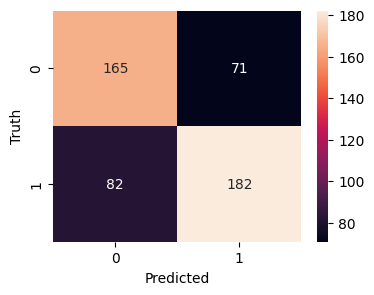

In [76]:
evalute_and_cm(cnn_model, x_test, y_test)

In [ ]:
# 0.7150 , 135,64,50,151

#### Making Predictions 🚀🔮


In [79]:
y_predicted_x_test_df = cnn_model.predict(predication_images)
y_predicted_x_test_df = np.round(y_predicted_x_test_df).astype(int).reshape(predication_images.shape[0])

8/8 [==============================] - 1s 72ms/step


In [80]:
sample_submission['label'] = y_predicted_x_test_df

sample_submission.head(10)

sample_submission.to_csv('submission.csv', index=False)

print("Visualizing Predictions 📊📈")

Visualizing Predictions 📊📈


#### Implementing Dropout for Regularization 🕳️🔄


In [81]:
cnn_model_dropout = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3,
                        input_shape=(image_size_pixels, image_size_pixels, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

cnn_model_dropout.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

In [82]:
cnn_model_dropout.fit(x_train, y_train, epochs=5,
              batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 23s 216ms/step - loss: 0.7186 - accuracy: 0.4950 - val_loss: 0.6867 - val_accuracy: 0.5700
Epoch 2/5
100/100 [==============================] - 23s 225ms/step - loss: 0.6922 - accuracy: 0.5331 - val_loss: 0.6676 - val_accuracy: 0.5800
Epoch 3/5
100/100 [==============================] - 22s 222ms/step - loss: 0.6752 - accuracy: 0.5625 - val_loss: 0.6435 - val_accuracy: 0.6000
Epoch 4/5
100/100 [==============================] - 23s 231ms/step - loss: 0.6873 - accuracy: 0.5575 - val_loss: 0.6835 - val_accuracy: 0.5275
Epoch 5/5
100/100 [==============================] - 22s 221ms/step - loss: 0.6518 - accuracy: 0.6131 - val_loss: 0.6185 - val_accuracy: 0.6325


16/16 [==============================] - 1s 75ms/step - loss: 0.6197 - accuracy: 0.6340
Accuracy on test set is: 0.6340000033378601
16/16 [==============================] - 1s 75ms/step


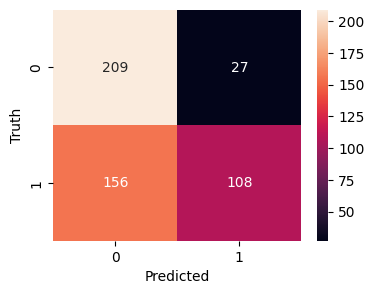

In [83]:
evalute_and_cm(cnn_model_dropout, x_test, y_test)

#### Implementing batch for Regularization 🕳️🔄


In [84]:
cnn_model_batch = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3,
                        input_shape=(image_size_pixels, image_size_pixels, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

cnn_model_batch.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

In [85]:
cnn_model_batch.fit(x_train, y_train, epochs=5,
              batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 30s 282ms/step - loss: 1.0775 - accuracy: 0.5512 - val_loss: 9.7235 - val_accuracy: 0.5100
Epoch 2/5
100/100 [==============================] - 28s 285ms/step - loss: 0.6854 - accuracy: 0.5650 - val_loss: 1.5772 - val_accuracy: 0.5325
Epoch 3/5
100/100 [==============================] - 29s 290ms/step - loss: 0.6955 - accuracy: 0.5412 - val_loss: 4.6115 - val_accuracy: 0.5125
Epoch 4/5
100/100 [==============================] - 29s 293ms/step - loss: 0.7288 - accuracy: 0.5294 - val_loss: 0.9702 - val_accuracy: 0.5525
Epoch 5/5
100/100 [==============================] - 29s 293ms/step - loss: 0.7062 - accuracy: 0.5113 - val_loss: 0.9910 - val_accuracy: 0.5950


16/16 [==============================] - 2s 112ms/step - loss: 1.1959 - accuracy: 0.5240
Accuracy on test set is: 0.5239999890327454
16/16 [==============================] - 2s 119ms/step


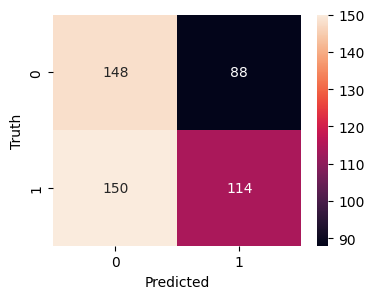

In [86]:
evalute_and_cm(cnn_model_batch, x_test, y_test)

#### Data Augmentation for Improved Generalization 🔄📸


In [87]:
print("Data Augmentation for Improved Generalization 🔄📸")

Data Augmentation for Improved Generalization 🔄📸


### Conclusion 🎉🏁


#### **Score: 0.7300**
